### ecommerce project

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
customers=pd.read_csv('Ecommerce Customers')

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [16]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [22]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

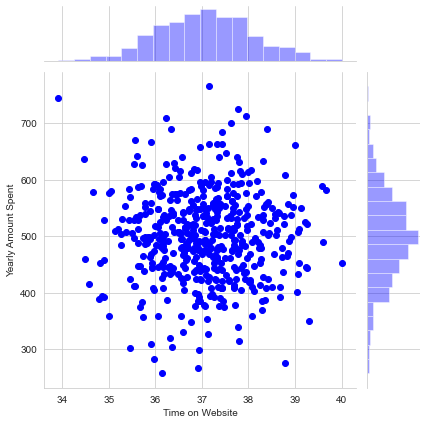

In [23]:
sns.jointplot('Time on Website','Yearly Amount Spent',data=customers,color='blue',)

In [11]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


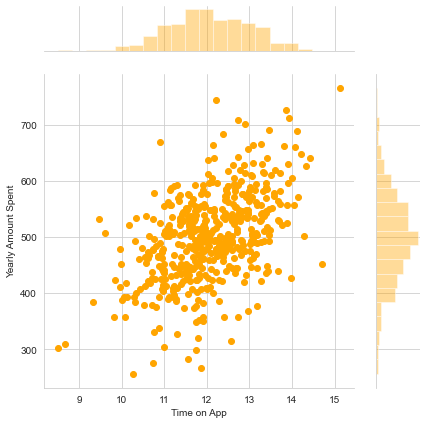

In [24]:
sns.jointplot('Time on App','Yearly Amount Spent',data=customers,color='orange',space=0.5)

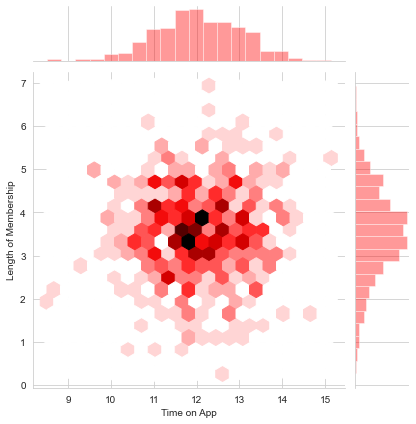

In [26]:
sns.jointplot('Time on App','Length of Membership',data=customers,color='red',kind='hex')

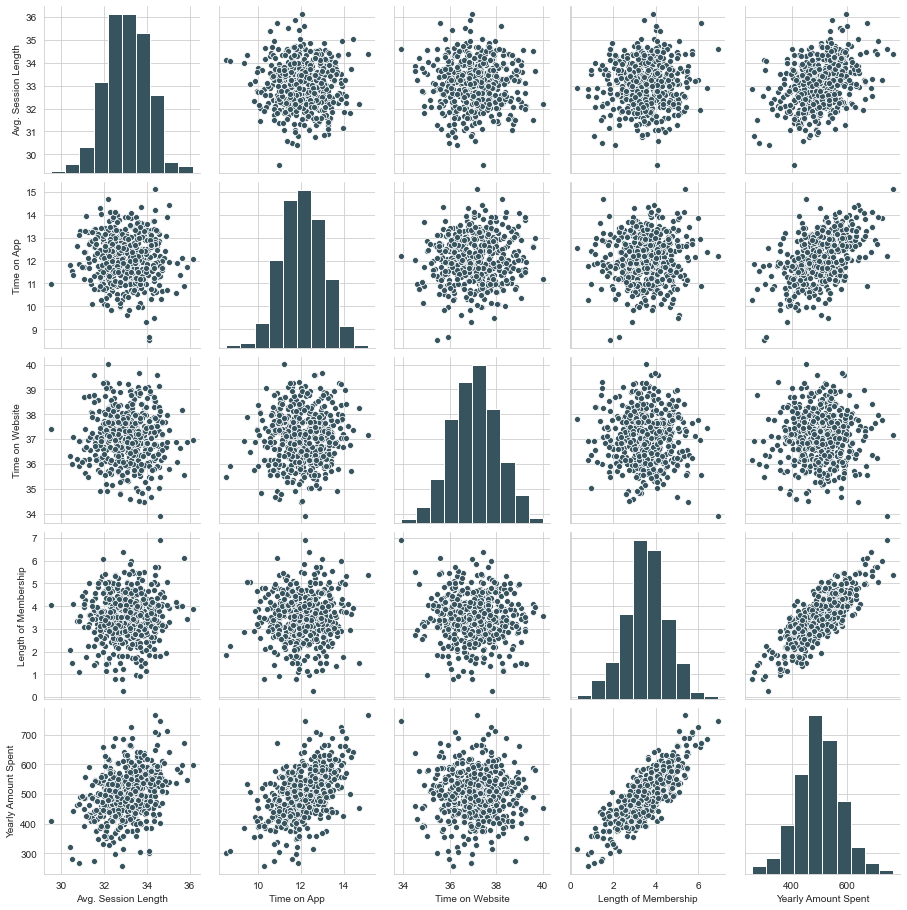

In [29]:
sns.pairplot(customers,palette='coolwarm')

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

Length of Membership

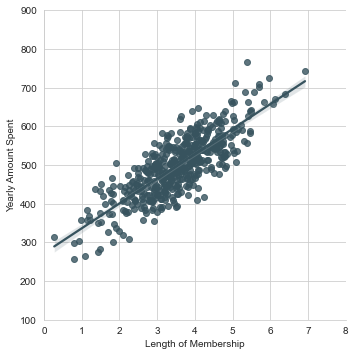

In [45]:
a_plot=sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers,palette='brg',aspect=1)
a_plot.set(xlim=(-0,8),ylim=(100,900))


In [47]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [52]:
X=customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y=customers['Yearly Amount Spent']

In [53]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [54]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [65]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
202,31.525752,11.340036,37.039514,3.811248
428,31.862741,14.039867,37.022269,3.738225
392,33.258238,11.514949,37.128039,4.662845
86,33.877779,12.517666,37.151921,2.669942
443,33.025020,12.504220,37.645839,4.051382
...,...,...,...,...
63,32.789773,11.670066,37.408748,3.414688
326,33.217188,10.999684,38.442767,4.243813
337,31.827979,12.461147,37.428997,2.974737
11,33.879361,11.584783,37.087926,3.713209


In [66]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
18,32.187812,14.715388,38.244115,1.516576
361,32.077590,10.347877,39.045156,3.434560
104,31.389585,10.994224,38.074452,3.428860
4,33.330673,12.795189,37.536653,4.446308
156,32.294642,12.443048,37.327848,5.084861
...,...,...,...,...
147,32.255901,10.480507,37.338670,4.514122
346,32.765665,12.506548,35.823467,3.126509
423,33.128693,10.398458,36.683393,3.859818
17,32.338899,12.013195,38.385137,2.420806


In [69]:
y_train

202    443.965627
428    556.298141
392    549.131573
86     487.379306
443    561.516532
          ...    
63     483.159721
326    505.230068
337    440.002748
11     522.337405
351    533.396554
Name: Yearly Amount Spent, Length: 350, dtype: float64

In [70]:
y_test

18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
          ...    
147    479.731938
346    488.387526
423    461.112248
17     407.704548
259    375.398455
Name: Yearly Amount Spent, Length: 150, dtype: float64

In [71]:
from sklearn.linear_model import LinearRegression

In [73]:
lm=LinearRegression()

In [74]:
lm.fit(X_train,y_train)

LinearRegression()

In [75]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [76]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'Predicted Values ')

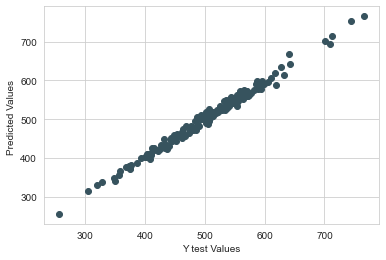

In [91]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test Values')
plt.ylabel('Predicted Values ')

In [79]:
from sklearn import metrics

In [80]:
mae=metrics.mean_absolute_error(y_test,predictions)
mse=metrics.mean_squared_error(y_test,predictions)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predictions))

In [81]:
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642


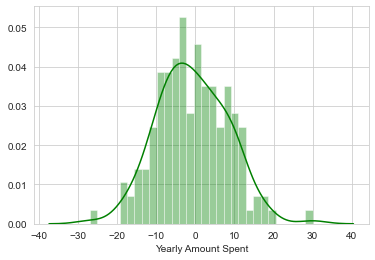

In [86]:
sns.distplot((y_test-predictions),bins=30,color='green')

In [87]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [88]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [89]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

Using function lm.coef_
Coefficients are the Yearly Amount spent variations 

A 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.

**Do you think the company should focus more on their mobile app or on their website?**

well the amount of money spent on the mobile app is showing signs of linear progression and taking the time factor , as we move forward .. usage of apps is going to be progressive but you cannot discard the importance of website as well "length of membership " is also factor considering the linear model of it agianst the money spent anually .